In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras import models

In [10]:
fashion_mnist = keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_lables) = fashion_mnist.load_data()

In [4]:
training_images = training_images.reshape(-1, 28,28, 1)
test_images = test_images.reshape(-1, 28,28, 1)
training_images.shape, test_images.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
training_images = training_images.astype('float32')
test_images = test_images.astype('float32')
training_images = training_images / 255.
test_images = test_images / 255.

In [12]:
from tensorflow.keras.utils import to_categorical
training_labels_one_hot = to_categorical(training_labels)
test_lables_one_hot = to_categorical(test_lables)
print('Original label:', training_labels[0])
print('After conversion to one-hot:', training_labels_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


#Model With one CNN layer

In [13]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [14]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1),padding='valid'))
fashion_model.add(MaxPooling2D((2, 2),padding='valid'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='relu'))            
fashion_model.add(Dense(10, activation='softmax'))

In [15]:
fashion_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
fashion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

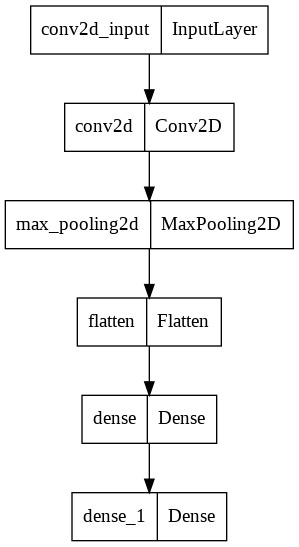

In [17]:
plot_model(fashion_model)

In [18]:
history =fashion_model.fit(training_images, training_labels_one_hot, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.8649 - accuracy: 0.8462
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2893 - accuracy: 0.8950
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2520 - accuracy: 0.9072
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2309 - accuracy: 0.9157
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2107 - accuracy: 0.9219
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1943 - accuracy: 0.9284
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1791 - accuracy: 0.9333
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1598 - accuracy: 0.9398
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1495 - accuracy: 0.9442
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1

In [20]:
test_loss, test_acc = fashion_model.evaluate(test_images, test_lables_one_hot)
print(test_acc)

313/313 [==============================] - 2s 4ms/step - loss: 0.4191 - accuracy: 0.8991
0.8991000056266785


##Model With 2 CNN layers

In [21]:
fashion_model2 = Sequential()
fashion_model2.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1),padding='valid'))
fashion_model2.add(MaxPooling2D((2, 2),padding='valid'))
fashion_model2.add(Conv2D(64, (3, 3), activation='relu',padding='valid'))
fashion_model2.add(MaxPooling2D(pool_size=(2, 2),padding='valid'))
fashion_model2.add(Flatten())
fashion_model2.add(Dense(128, activation='relu'))            
fashion_model2.add(Dense(10, activation='softmax'))

In [22]:
fashion_model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
fashion_model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

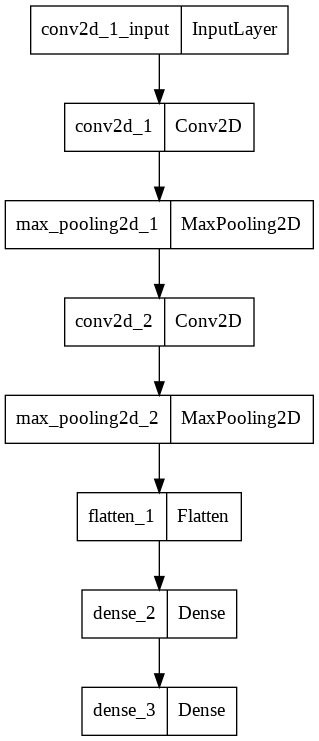

In [36]:
plot_model(fashion_model2)

In [26]:
history =fashion_model2.fit(training_images, training_labels_one_hot, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.5745 - accuracy: 0.8320
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3295 - accuracy: 0.8789
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2869 - accuracy: 0.8952
Epoch 4/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2616 - accuracy: 0.9024
Epoch 5/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2396 - accuracy: 0.9115
Epoch 6/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2208 - accuracy: 0.9161
Epoch 7/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2040 - accuracy: 0.9222
Epoch 8/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1866 - accuracy: 0.9301
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1760 - accuracy: 0.9340
Epoch 10/10
1875/1875 [==============================] - 10s 6ms/step - l

In [27]:
test_loss, test_acc = fashion_model2.evaluate(test_images, test_lables_one_hot)
print(test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.3869 - accuracy: 0.8925
0.8924999833106995


##Model With 3 CNN layers

In [28]:
fashion_model3 = Sequential()
fashion_model3.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1),padding='valid'))
fashion_model3.add(MaxPooling2D((2, 2),padding='valid'))
fashion_model3.add(Conv2D(64, (3, 3), activation='relu',padding='valid'))
fashion_model3.add(MaxPooling2D(pool_size=(2, 2),padding='valid'))
fashion_model3.add(Conv2D(128, (3, 3), activation='relu',padding='valid'))
fashion_model3.add(MaxPooling2D(pool_size=(2, 2),padding='valid'))
fashion_model3.add(Flatten())
fashion_model3.add(Dense(128, activation='relu'))            
fashion_model3.add(Dense(10, activation='softmax'))

In [29]:
fashion_model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
fashion_model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 1, 128)       

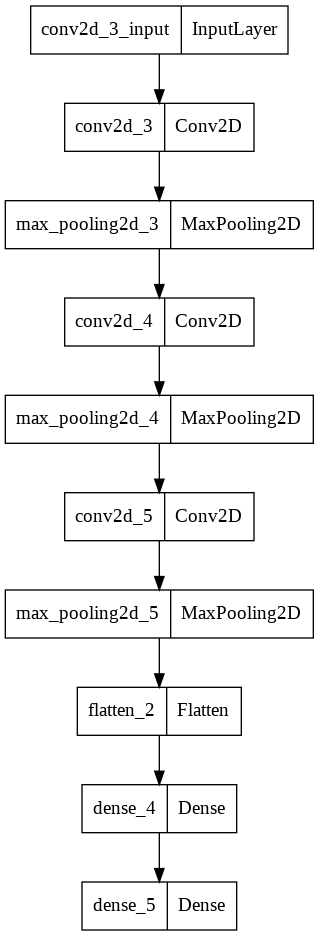

In [37]:
plot_model(fashion_model3)

In [33]:
history =fashion_model3.fit(training_images, training_labels_one_hot, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.5854 - accuracy: 0.8017
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3896 - accuracy: 0.8572
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3428 - accuracy: 0.8740
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3198 - accuracy: 0.8816
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2973 - accuracy: 0.8890
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2765 - accuracy: 0.8977
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2588 - accuracy: 0.9025
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2453 - accuracy: 0.9076
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2333 - accuracy: 0.9117
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - l

In [34]:
test_loss, test_acc = fashion_model3.evaluate(test_images, test_lables_one_hot)
print(test_acc)

313/313 [==============================] - 2s 4ms/step - loss: 0.3768 - accuracy: 0.8804
0.8804000020027161
